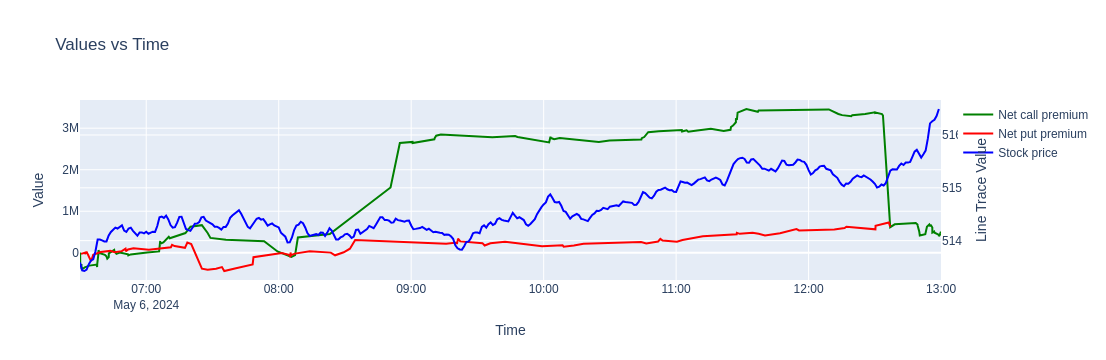

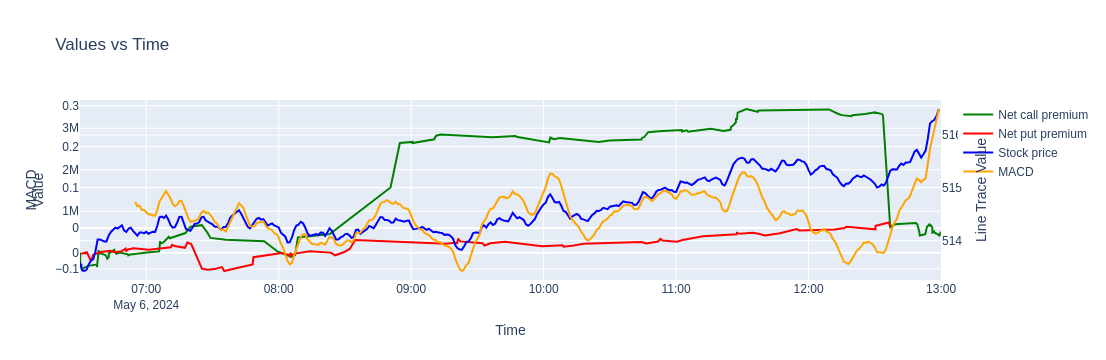

In [43]:
import importlib
import flow_data_loader
importlib.reload(flow_data_loader)
from flow_data_loader import FlowDataLoader
import pandas as pd
from datetime import datetime
import os
from stock_pandas import StockDataFrame
import pytz

def to_timestamp_obj(epoch_time):
    return datetime.fromtimestamp(epoch_time / 1000, pytz.timezone("US/Pacific"))

def get_stock_df(date_obj):
    file_name = "stock_" + date_str + ".csv"
    spy_stock_path=os.path.join("../data/flow_data/", str(date_obj.month), str(date_obj.day), file_name)
    df = pd.read_csv(spy_stock_path)
    df['timestamp_obj'] = df['timestamp'].apply(to_timestamp_obj)
    # Filter between 6:30 and 1:00
    filtered_df = df[((df['timestamp_obj'].dt.hour == 6) & (df['timestamp_obj'].dt.minute >= 30)) | 
                     ((df['timestamp_obj'].dt.hour >= 7) & (df['timestamp_obj'].dt.hour < 13)) | 
                     ((df['timestamp_obj'].dt.hour == 0) & (df['timestamp_obj'].dt.minute == 0))]
    filtered_df = StockDataFrame(filtered_df, date_col='timestamp_obj')
    filtered_df['timestamp_obj'] = filtered_df.index
    filtered_df['macdh'] = filtered_df['macd.histogram']
    return filtered_df

# Can lookup any date in april 2024. Flow data available until '2024-05-06'
date_str = '2024-05-06' # compare with May6TradyticsNetFlowPlot.html for 2024-05-06'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')
df = get_stock_df(date_obj)
f_loader = FlowDataLoader()
put_data = f_loader.get_put_data_for_date(date_obj)
bullish_put_data = f_loader.get_bullish_put_data(date_obj)
bearish_put_data = f_loader.get_bearish_put_data(date_obj)
bearish_call_data = f_loader.get_bearish_call_data(date_obj)
bullish_call_data = f_loader.get_bullish_call_data(date_obj)
net_call_premium, net_call_time = f_loader.get_net_call_premium(date_obj)
net_put_premium, net_put_time = f_loader.get_net_put_premium(date_obj)

# https://tradytics.com/options-market netflow
f_loader.plot_flow_without_macd(df, net_call_premium, net_call_time, net_put_premium, net_put_time)
# convergence subplot for macd
f_loader.plot_flow_with_macd(df, net_call_premium, net_call_time, net_put_premium, net_put_time)